In [58]:
import pandas as pd; pd.set_option('display.max_columns', 30)
import numpy as np
from cmlreaders import CMLReader, get_data_index
from ptsa.data.filters import ButterworthFilter
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
from copy import copy
from scipy import stats
import pickle
plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42 # fix fonts for Illustrator
sys.path.append('/home1/john/Downloads/ptsa_plot-master/')
sys.path.append('/home1/john/johnModules')
from brain_labels import MTL_labels, LTC_labels, PFC_labels, OTHER_labels, ALL_labels, temporal_lobe_labels # all location labels
%load_ext autoreload
%autoreload
from general import *
from SWRmodule import *

df = get_data_index("r1") # all RAM subjects
exp = 'FR1' # 'FR1' 'catFR1'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
# sub lists I've been using to explore FR1 

# subs = ['R1010J'] #'R1385E'] # ['R1065J'] #
subs = ['R1002P','R1003P','R1006P','R1010J','R1112M','R1163T'] # initial 6 for hippocampus

sub_df = df[(df.subject.isin(subs))  & (df.experiment == exp)] # all sessions for subs
# sub_df = df[(df.subject.isin(subs))  & (df.experiment == exp) & (df.session==1)] # single session
# sub_df = df[(df.experiment == exp) & (df.session == 0)] # all FR subs 
# sub_df = sub_df[5:]
sub_df

,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
9,NaN,protocols/r1/subjects/R1002P/experiments/FR1/s...,protocols/r1/subjects/R1002P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1002P/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1002P/localizations/0/m...,NaN,0,R1002P,R1002P,NaN,protocols/r1/subjects/R1002P/experiments/FR1/s...
10,NaN,protocols/r1/subjects/R1002P/experiments/FR1/s...,protocols/r1/subjects/R1002P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1002P/experiments/FR1/s...,0,NaN,1,protocols/r1/subjects/R1002P/localizations/0/m...,NaN,1,R1002P,R1002P,NaN,protocols/r1/subjects/R1002P/experiments/FR1/s...
17,NaN,protocols/r1/subjects/R1003P/experiments/FR1/s...,protocols/r1/subjects/R1003P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1003P/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1003P/localizations/0/m...,NaN,0,R1003P,R1003P,1.0,protocols/r1/subjects/R1003P/experiments/FR1/s...
18,NaN,protocols/r1/subjects/R1003P/experiments/FR1/s...,protocols/r1/subjects/R1003P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1003P/experiments/FR1/s...,0,NaN,1,protocols/r1/subjects/R1003P/localizations/0/m...,NaN,1,R1003P,R1003P,1.0,protocols/r1/subjects/R1003P/experiments/FR1/s...
25,NaN,protocols/r1/subjects/R1006P/experiments/FR1/s...,protocols/r1/subjects/R1006P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1006P/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1006P/localizations/0/m...,NaN,0,R1006P,R1006P,NaN,protocols/r1/subjects/R1006P/experiments/FR1/s...
26,NaN,protocols/r1/subjects/R1006P/experiments/FR1/s...,protocols/r1/subjects/R1006P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1006P/experiments/FR1/s...,0,NaN,1,protocols/r1/subjects/R1006P/localizations/0/m...,NaN,1,R1006P,R1006P,NaN,protocols/r1/subjects/R1006P/experiments/FR1/s...
37,NaN,protocols/r1/subjects/R1010J/experiments/FR1/s...,protocols/r1/subjects/R1010J/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1010J/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1010J/localizations/0/m...,NaN,0,R1010J,R1010J,NaN,protocols/r1/subjects/R1010J/experiments/FR1/s...
38,NaN,protocols/r1/subjects/R1010J/experiments/FR1/s...,protocols/r1/subjects/R1010J/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1010J/experiments/FR1/s...,0,NaN,1,protocols/r1/subjects/R1010J/localizations/0/m...,NaN,1,R1010J,R1010J,NaN,protocols/r1/subjects/R1010J/experiments/FR1/s...
639,NaN,protocols/r1/subjects/R1112M/experiments/FR1/s...,protocols/r1/subjects/R1112M/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1112M/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1112M/localizations/0/m...,NaN,0,R1112M,R1112M,1.0,protocols/r1/subjects/R1112M/experiments/FR1/s...
640,NaN,protocols/r1/subjects/R1112M/experiments/FR1/s...,protocols/r1/subjects/R1112M/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1112M/experiments/FR1/s...,0,NaN,1,protocols/r1/subjects/R1112M/localizations/0/m...,NaN,1,R1112M,R1112M,1.0,protocols/r1/subjects/R1112M/experiments/FR1/s...


In [60]:
# 575 FR sessions. first 18 of don't load so skip those 
exp_df = df[df.experiment==exp]
if exp == 'FR1':
    exp_df = exp_df[
                    ((df.subject!='R1015J') | (df.session!=0)) & 
                    ((df.subject!='R1063C') | (df.session!=1)) & 
                    ((df.subject!='R1093J') | (~df.session.isin([1,2]))) &
                    ((df.subject!='R1100D') | (~df.session.isin([0,1,2]))) &
                    ((df.subject!='R1120E') | (df.session!=0)) &
                    ((df.subject!='R1122E') | (df.session!=2)) &
                    ((df.subject!='R1154D') | (df.session!=0)) &
                    ((df.subject!='R1186P') | (df.session!=0)) &
                    ((df.subject!='R1201P') | (~df.session.isin([0,1]))) &
                    ((df.subject!='R1216E') | (~df.session.isin([0,1,2]))) &
                    ((df.subject!='R1277J') | (df.session!=0)) &
                    ((df.subject!='R1413D') | (df.session!=0)) & 
                    ((df.subject!='R1123C') | (df.session!=2)) & # artifacts that bleed through channels (see SWR FR1 prob sessions ppt)
                    ((df.subject!='R1151E') | (~df.session.isin([1,2]))) & # more bleed-through artifacts (see same ppt)
                    ((df.subject!='R1275D') | (df.session!=3))  # 3rd session an actual repeat of 2nd session (Paul should have removed from database by now)
    #                 (df.subject!='R1065J') # sub with 9000 trials
                   ] 
if exp == 'catFR1': 
    exp_df = exp_df[
                    ((df.subject!='R1044J') | (df.session!=0)) & # too few trials to do pg pairwise corr
                    ((df.subject!='R1491T') | (~df.session.isin([1,3,5]))) & # too few trials to do pg pairwise corr
                    ((df.subject!='R1486J') | (~df.session.isin([4,5,6,7]))) & # repeated data...will be removed at some point... @@
                    ((df.subject!='R1501J') | (~df.session.isin([0,1,2,3,4,5]))) & # these weren't catFR1 (and they don't load right anyway)
                    ((df.subject!='R1235E') | (df.session!=0)) & # split EEG filenames error...documented on Asana
                    ((df.subject!='R1310J') | (df.session!=1)) & # session 1 is just a repeat of session 0
                    ((df.subject!='R1239E') | (df.session!=0)) # some correlated noise (can see in catFR1 problem sessions ppt)
    ]
exp_df.shape
# exp_df = exp_df[257:] # for catFR1 this is R1385E-onwwards
# exp_df = exp_df[472:] # for FR1 this is R1385E-onwwards
# exp_df = exp_df[-19:]
exp_df

/home1/john/anaconda3/envs/env1/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(565, 17)

,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
0,NaN,protocols/r1/subjects/R1001P/experiments/FR1/s...,protocols/r1/subjects/R1001P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1001P/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,0,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/FR1/s...
1,NaN,protocols/r1/subjects/R1001P/experiments/FR1/s...,protocols/r1/subjects/R1001P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1001P/experiments/FR1/s...,0,NaN,1,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,1,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/FR1/s...
9,NaN,protocols/r1/subjects/R1002P/experiments/FR1/s...,protocols/r1/subjects/R1002P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1002P/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1002P/localizations/0/m...,NaN,0,R1002P,R1002P,NaN,protocols/r1/subjects/R1002P/experiments/FR1/s...
10,NaN,protocols/r1/subjects/R1002P/experiments/FR1/s...,protocols/r1/subjects/R1002P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1002P/experiments/FR1/s...,0,NaN,1,protocols/r1/subjects/R1002P/localizations/0/m...,NaN,1,R1002P,R1002P,NaN,protocols/r1/subjects/R1002P/experiments/FR1/s...
17,NaN,protocols/r1/subjects/R1003P/experiments/FR1/s...,protocols/r1/subjects/R1003P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1003P/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1003P/localizations/0/m...,NaN,0,R1003P,R1003P,1.0,protocols/r1/subjects/R1003P/experiments/FR1/s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,NaN,protocols/r1/subjects/R1565T/experiments/FR1/s...,protocols/r1/subjects/R1565T/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1565T/experiments/FR1/s...,0,NaN,NaN,protocols/r1/subjects/R1565T/localizations/0/m...,NaN,0,R1565T,R1565T,1.0,protocols/r1/subjects/R1565T/experiments/FR1/s...
2540,NaN,protocols/r1/subjects/R1569T/experiments/FR1/s...,protocols/r1/subjects/R1569T/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1569T/experiments/FR1/s...,0,NaN,NaN,protocols/r1/subjects/R1569T/localizations/0/m...,NaN,0,R1569T,R1569T,1.0,protocols/r1/subjects/R1569T/experiments/FR1/s...
2545,NaN,protocols/r1/subjects/R1571T/experiments/FR1/s...,protocols/r1/subjects/R1571T/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1571T/experiments/FR1/s...,0,NaN,NaN,protocols/r1/subjects/R1571T/localizations/0/m...,NaN,0,R1571T,R1571T,1.0,protocols/r1/subjects/R1571T/experiments/FR1/s...
2549,NaN,protocols/r1/subjects/R1572T/experiments/FR1/s...,protocols/r1/subjects/R1572T/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1572T/experiments/FR1/s...,0,NaN,NaN,protocols/r1/subjects/R1572T/localizations/0/m...,NaN,0,R1572T,R1572T,1.0,protocols/r1/subjects/R1572T/experiments/FR1/s...


In [61]:
## Now to load data from cluster, have to go through and append across sessions

### params that clusterRun used (note that exp is defined in first cell so can get exp_df above)

selected_period = 'surrounding_recall'
# 'surrounding_recall': aligned to time of free recall 
# 'whole_retrieval': aligned to beginning of retrieval period (beep_off)
# 'encoding': aligned to word_on
# 'whole_encoding': aligned to 1st word of each encoding period and ends 29.7 s later (average time for 12 words to be shown)
#               NOTE: this analysis is in SWRanalysis-encoding.ipynb now
# 'math': aligned to math problem on
# 'math_retrieval': aligned to math problem key-in time

recall_type_switch = 6
    # (1 and 3 are basically opposites...those with a subsequent recall and those without)
    # 0: Original analysis taking only recalls without a recall in 2 s IRI before them
    # 1: Take these same recalls, but keep only those WITH a recall within 2 s after they occur 
    # 2: test condition where we look at second recalls within IRI ONLY (there is an initial recall in 2 s before current recall)
    # 3: isolatead recalls with no other recalls +/- RECALL_MINIMUM s
    # 4: only first recall of every retrieval period
    # 5: take only those recalls that come second in retrieval period within 2 s of first retrieval
    # 6: take only NOT first recall of every retrieval period (opposite of 4)
    # 7: take only NOT first recall AND ISOLATED trials (this should REALLY maximize SWR bump)
    # 8: take only 2nd recalls
    # 10: same as 0 but with no IRI (mostly just to see number of recalls)
recall_minimum = 2000 # used if recall_type_switch = 3
region_name = 'TEMPORALLOBE' #'ENT' #'HPC' #HPC_ENT #ENT #HPC # PHC # TEMPORALLOBE
remove_soz_ictal = 0 # 0 for nothing, 1 for remove SOZ, 2 for keep ONLY SOZ ###
filter_type = 'hamming' # butter/hamming/hamming125200/tried hamming140250 for math
sub_selection = 'whole' # 'second_half', 'whole' ,'first_half'
                              # analyze first 40%, remaining 60% of data, or whole? 
                              # works for FR1 and catFR1
###

# get strings for path name for save and loading cluster data
if recall_type_switch in [0,4,6,8]:
    # for these I'm using all trials, but selecting for which recall after the fact
    soz_label,recall_selection_name,subfolder = getSWRpathInfo(remove_soz_ictal,0,selected_period,recall_minimum)
else: # these others I haven't set up indexing (see >line 100 in this cell)
    soz_label,recall_selection_name,subfolder = getSWRpathInfo(remove_soz_ictal,recall_type_switch,selected_period,recall_minimum)
    
ripple_array = []; 
trial_nums = []; encoded_word_key_array = []
HPC_names = []; sub_sess_names = []
region_electrode_ct = []; sub_names = []
trial_by_trial_correlation = []; elec_ripple_rate_array = []
elec_by_elec_correlation = []; fr_array = []
list_num_key = []

serialpos_array = []; list_recall_num_array = []; # ~~~
rectime_array = []; recall_before_intrusion_array = []
recall_position_array = []

electrode_labels = []; channel_coords = []; channel_nums = []

analysis_df = getSplitDF(exp_df,sub_selection,exp)

for row in exp_df.itertuples(): #analysis_df.itertuples(): #sub_df.itertuples():  
    try:
        sub = row.subject; session = row.session; exp = row.experiment

        path_name = '/scratch/john/SWR_scratch/'+subfolder
        fn = os.path.join(path_name,
            'SWR_'+exp+'_'+sub+'_'+str(session)+'_'+region_name+'_'+selected_period+recall_selection_name+
                          '_'+soz_label+'_'+filter_type+'.p') #'_no_param_removal.p')   #'.p') #+'.intrusions.p') # +'.-wrong.p') (for wrong math)
        with open(fn,'rb') as f:
            dat = pickle.load(f)

            ripple_array = superVstack(ripple_array,dat['ripple_array']) 
            region_electrode_ct.append(dat['region_electrode_ct'])
            encoded_word_key_array.extend(dat['encoded_word_key_array'])
            HPC_names.extend(dat['HPC_names'])
            sub_sess_names.extend(dat['sub_sess_names'])
            sub_names.extend(dat['sub_names'])
            trial_nums = np.append(trial_nums,dat['trial_nums'])
            trial_by_trial_correlation.extend(dat['trial_by_trial_correlation']) # one value for each electrode for this session
            elec_by_elec_correlation = np.append(elec_by_elec_correlation,dat['elec_by_elec_correlation'])
            elec_ripple_rate_array.extend(dat['elec_ripple_rate_array']) # ripple rate by electrode so append
            #,'total_recalls':total_recalls, 'kept_recalls':kept_recalls}, f)
            if selected_period == 'whole_retrieval':
                if np.shape(dat['fr_array'])[0]!=np.shape(dat['ripple_array'])[0]:
                    print(sub+str(session))
                fr_array = superVstack(fr_array,dat['fr_array'])
            elif selected_period == 'encoding':
                serialpos_array.extend(dat['serialpos_array'])
            elif selected_period == 'surrounding_recall': # ~~~
                serialpos_array.extend(dat['serialpos_array']); list_recall_num_array.extend(dat['list_recall_num_array']); # ~~
                rectime_array.extend(dat['rectime_array']); recall_before_intrusion_array.extend(dat['recall_before_intrusion_array'])
                recall_position_array.extend(dat['recall_position_array'])
            elif (selected_period == 'math') | (selected_period == 'math_retrieval'):
                rectime_array.extend(dat['rectime_array'])
                recall_position_array.extend(dat['recall_position_array']); list_recall_num_array.extend(dat['list_recall_num_array'])
            elif selected_period == 'whole_encoding':
                serialpos_array.extend(dat['serialpos_array']); recall_position_array.extend(dat['recall_position_array'])
                list_recall_num_array.extend(dat['list_recall_num_array']); 

            electrode_labels.extend(dat['electrode_labels'])
            channel_coords.extend(dat['channel_coords'])
            channel_nums.extend(dat['channel_nums'])
            list_num_key.extend(dat['list_num_key'])
            
    except Exception as e:
        LogDFExceptionLine(row, e, 'ClusterLoadSWR_log.txt')  
print('**Done reading data**')
        
## loading *all* the recalls with 0, but if it's 4 or 6 load just those trials

# trying new method of loading...translate these to ripple_array length dependent on recall_type_switch 
# (this way I can always load from recall_type_switch = 0)

subject_name_array,session_name_array,electrode_array,channel_coords_array,channel_nums_array = getSubSessPredictorsWithChannelNums(
        sub_names,sub_sess_names,trial_nums,electrode_labels,channel_coords,channel_nums)

if selected_period == 'surrounding_recall':
    if recall_type_switch == 4:
        temp_recall_idxs = np.array(recall_position_array)==1
    elif recall_type_switch == 6:
        temp_recall_idxs = np.array(recall_position_array)>1
    elif recall_type_switch == 8:
        temp_recall_idxs = np.array(recall_position_array)==2
    else:
        temp_recall_idxs = np.array(recall_position_array)>=0
    serialpos_array = np.array(serialpos_array)[temp_recall_idxs]
    recall_before_intrusion_array = np.array(recall_before_intrusion_array)[temp_recall_idxs]
    list_num_key = np.array(list_num_key)[temp_recall_idxs]
elif (selected_period == 'math') | (selected_period == 'math_retrieval'):
    temp_recall_idxs = np.array(recall_position_array)>=0 # just keep them all for math
    encoded_word_key_array.extend(dat['encoded_word_key_array'])
elif selected_period == 'whole_encoding':
    temp_recall_idxs = np.array(list_recall_num_array)>=0 # just keep them all
    
subject_name_array = np.array(subject_name_array)[temp_recall_idxs]
session_name_array = np.array(session_name_array)[temp_recall_idxs]
electrode_array = np.array(electrode_array)[temp_recall_idxs]
channel_coords_array = np.array(channel_coords_array)[temp_recall_idxs]
channel_nums_array = np.array(channel_nums_array)[temp_recall_idxs]
ripple_array = np.array(ripple_array)[temp_recall_idxs]
rectime_array = np.array(rectime_array)[temp_recall_idxs]
list_recall_num_array = np.array(list_recall_num_array)[temp_recall_idxs]
recall_position_array = np.array(recall_position_array)[temp_recall_idxs]
    
print('**Done translating to ripple_array frame**!!')
print('...')
print('% of all HPC subjects for '+exp)
if exp == 'catFR1':
    len(np.unique(sub_names))/136*100 # % HPC subs for catFR1
    print('% of HPC recalls for '+exp)
    ripple_array.shape[0]/50053*100 # % recalls for catFR1
if exp == 'FR1':
    len(np.unique(sub_names))/167*100 # % HPC subs for FR1
    print('% of HPC recalls for '+exp)
    ripple_array.shape[0]/60417*100 # % recalls for FR1
    
## some info on data loaded from cluster runs ##
ripple_array.shape

region_electrode_ct = np.array(region_electrode_ct)
# print('Number of electrodes in each session: '); region_electrode_ct
print('From '+str(sum(region_electrode_ct>0))+'/'+str(len(region_electrode_ct))+' sessions with >0 '+region_name+' electrodes')
print('Total electrodes: '+str(sum(region_electrode_ct)))
print('Length of HPC names: '+str(len(HPC_names)))
print('Total trials: '+str(np.sum(trial_nums)))
print('Unique sessions: '+str(len(np.unique(sub_sess_names))))
print('Unique subjects: '+str(len(np.unique(sub_names))))

# some info about regions 
print('Total electrodes: '+str(len(HPC_names)))
unique_names = np.unique(HPC_names); print(unique_names)
for name in unique_names:
    num_elecs = sum(np.array([names.find(name) for names in HPC_names])>=0)
    print(str(num_elecs)+' for '+name)
# channel_nums

[]
[]
2021-12-14_15-33-41: DF Exception: Sub: R1034D, Sess: 2, FileNotFoundError, [Errno 2] No such file or directory: '/scratch/john/SWR_scratch/IRIonly/SWR_FR1_R1034D_2_TEMPORALLOBE_surrounding_recall_soz_in_hamming.p', file: <ipython-input-61-8fdb09cb7d1b>, line no: 66
2021-12-14_15-33-41: DF Exception: Sub: R1045E, Sess: 0, FileNotFoundError, [Errno 2] No such file or directory: '/scratch/john/SWR_scratch/IRIonly/SWR_FR1_R1045E_0_TEMPORALLOBE_surrounding_recall_soz_in_hamming.p', file: <ipython-input-61-8fdb09cb7d1b>, line no: 66
2021-12-14_15-33-41: DF Exception: Sub: R1059J, Sess: 0, FileNotFoundError, [Errno 2] No such file or directory: '/scratch/john/SWR_scratch/IRIonly/SWR_FR1_R1059J_0_TEMPORALLOBE_surrounding_recall_soz_in_hamming.p', file: <ipython-input-61-8fdb09cb7d1b>, line no: 66
2021-12-14_15-33-42: DF Exception: Sub: R1062J, Sess: 1, FileNotFoundError, [Errno 2] No such file or directory: '/scratch/john/SWR_scratch/IRIonly/SWR_FR1_R1062J_1_TEMPORALLOBE_surrounding_rec

143.7125748502994

% of HPC recalls for FR1


340.39425989373854

(205656, 2000)

From 482/531 sessions with >0 TEMPORALLOBE electrodes
Total electrodes: 10162
Length of HPC names: 10162
Total trials: 380904.0
Unique sessions: 482
Unique subjects: 240
Total electrodes: 10162
[' left amygdala' ' left ent entorhinal area' ' left fug fusiform gyrus'
 ' left hippocampus' ' left itg inferior temporal gyrus'
 ' left mtg middle temporal gyrus' ' left phg parahippocampal gyrus'
 ' left pp planum polare' ' left pt planum temporale'
 ' left stg superior temporal gyrus' ' left tmp temporal pole'
 ' left ttg transverse temporal gyrus' ' right amygdala'
 ' right ent entorhinal area' ' right fug fusiform gyrus'
 ' right hippocampus' ' right itg inferior temporal gyrus'
 ' right mtg middle temporal gyrus' ' right phg parahippocampal gyrus'
 ' right pp planum polare' ' right pt planum temporale'
 ' right stg superior temporal gyrus' ' right tmp temporal pole'
 ' right ttg transverse temporal gyrus' '"ba35"' '"ba36"' '"ca1"' '"dg"'
 '"erc"' '"phc"' '"sub"' 'ba35' 'ba36' 'bankssts' '

## To make a video I need a time-binned ripple rate matrix along with the 3D coordinates

In [62]:
time_bin = 50 # in ms. Will average rate in this 50 ms bin
min_trials = 10 # minimum number of recalls for each electrode

# already downsampled to 500 Hz SR and going to downsample by factor of time_bin
downsample_factor = int(time_bin/2)

binned_elec_ripple_array = []
elec_channel_coords = []

# iterate over electrodes within each subject since need a separate binned_ripple_array for each

for sub in np.unique(subject_name_array):

    for elec in np.unique(electrode_array[subject_name_array==sub]):
    
        # this is array for a single electrode (can be multiple sessions--not a problem!)
        elec_ripple_array = ripple_array[(subject_name_array==sub) & (electrode_array==elec)]
        
        if len(elec_ripple_array) >= min_trials:
                
            # bin by downsampling and create elecs X time matrix for each subject
            binned_elec_ripple_array = superVstack(binned_elec_ripple_array,
                                        (1000/time_bin)*np.mean(downsampleBinary(elec_ripple_array,downsample_factor),0))

            elec_channel_coords.append(channel_coords_array[(subject_name_array==sub) & (electrode_array==elec)][0])
        
        

(4652, 80)
(4652, 3)


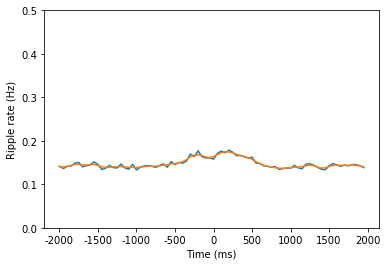

In [75]:
# to plot the binned array

print(np.shape(binned_elec_ripple_array))
print(np.shape(elec_channel_coords))

smoothing_triangle = 5

plot(np.mean(binned_elec_ripple_array,0))
plot(triangleSmooth(np.mean(binned_elec_ripple_array,0),smoothing_triangle))
ylim(0,0.5)
xticks(np.arange(0,80.1,10),np.arange(-2000,2001,500))
ylabel('Ripple rate (Hz)')
xlabel('Time (ms)');

## Now, we have to figure out how to deal with overlapping electrodes

In [77]:
spatial_bin = 5 # in mm. edge length of "voxel" that I'll average over for visualization
triangle_smooth = 1

elec_coords_df = pd.DataFrame(elec_channel_coords, columns = ['x','y','z'])
# elec_coords_df = elec_coords_df.sort_values(['x', 'y', 'z'], ascending=[True, True,True])
print('Number of electrodes: '+str(len(elec_coords_df)))

voxel_RRs = []
voxel_coords = []

# now go through every possible voxel with the spatial bin above and average over the PSTHs. Then save the averaged PSTH and the coordinate
for x in range(int(floor(min(elec_coords_df.x))),int(ceil(max(elec_coords_df.x))),spatial_bin):
    print('Done with x = '+str(x))
    for y in range(int(floor(min(elec_coords_df.y))),int(ceil(max(elec_coords_df.y))),spatial_bin):
        for z in range(int(floor(min(elec_coords_df.z))),int(ceil(max(elec_coords_df.z))),spatial_bin):
            voxel_df = elec_coords_df[
                        ( (elec_coords_df.x >= x) & (elec_coords_df.x < (x+spatial_bin)) ) & 
                        ( (elec_coords_df.y >= y) & (elec_coords_df.y < (y+spatial_bin)) ) & 
                        ( (elec_coords_df.z >= z) & (elec_coords_df.z < (z+spatial_bin)) )
                                    ]
            if len(voxel_df) > 0: # if there's an electrode in this range keep it
                # average ripple rate at voxel (even if only 1 electrode)
                if triangle_smooth == 1:
                    voxel_RRs.append( triangleSmooth(np.mean(binned_elec_ripple_array[voxel_df.index,:],0),smoothing_triangle) ) 
                else:
                    voxel_RRs.append( np.mean(binned_elec_ripple_array[voxel_df.index,:],0) ) 
                voxel_coords.append([x,y,z])
                
print(str(len(voxel_RRs))+' voxels of ripple rates for '+str(len(elec_coords_df))+\
      ' electrodes at '+str(spatial_bin)+' mm resolution')


Number of electrodes: 4652
Done with x = -79
Done with x = -74
Done with x = -69
Done with x = -64
Done with x = -59
Done with x = -54
Done with x = -49
Done with x = -44
Done with x = -39
Done with x = -34
Done with x = -29
Done with x = -24
Done with x = -19
Done with x = -14
Done with x = -9
Done with x = -4
Done with x = 1
Done with x = 6
Done with x = 11
Done with x = 16
Done with x = 21
Done with x = 26
Done with x = 31
Done with x = 36
Done with x = 41
Done with x = 46
Done with x = 51
Done with x = 56
Done with x = 61
Done with x = 66
Done with x = 71
Done with x = 76
1871 voxels of ripple rates for 4652 electrodes at 5 mm resolution


In [78]:
save_coords = 1

if save_coords == 1:
    if triangle_smooth == 1:
        extra = '-tri_smoothed'
    else:
        extra = ''    
    fn = '../figures/ripple_video/'+exp+'_'+region_name+'_'+'_ripple_rates_by_'+str(spatial_bin)+'mm_voxel-'+\
        str(recall_type_switch)+extra+'.npz'
    np.savez(fn, ripple_rates=voxel_RRs, coords=voxel_coords)
    print('saved coords in: '+os.getcwd())

saved coords in: /home1/john/SWR/code


In [24]:
np.shape(voxel_coords)
voxel_coords[0:5]
np.shape(voxel_RRs)
np.array(voxel_RRs)[:,1] # single time point

(151, 3)

[[-65, -68, -8],
 [-65, -48, -8],
 [-65, -28, -13],
 [-65, -8, -38],
 [-60, -73, -8]]

(151, 80)

array([0.        , 0.        , 0.39215686, 0.12941176, 0.        ,
       0.10786517, 0.        , 0.56153846, 0.        , 0.15280899,
       0.31538462, 0.        , 0.34157303, 0.09230769, 0.53846154,
       0.16179775, 0.11923077, 0.18823529, 0.11685393, 0.19775281,
       0.18876404, 0.04494382, 0.14263566, 0.37752809, 0.13846154,
       0.5752809 , 0.25882353, 0.2668175 , 0.14263566, 0.38651685,
       0.37752809, 0.13483146, 0.06821705, 0.00620155, 0.30196078,
       0.19224806, 0.55730337, 0.9258427 , 0.        , 0.31538462,
       0.35961538, 0.        , 0.        , 0.08682171, 0.11782946,
       0.91111111, 0.30387597, 0.15280899, 0.12692308, 0.31153846,
       0.00620155, 0.33921569, 0.18876404, 0.21538462, 0.        ,
       0.36923077, 0.0516129 , 0.20645161, 0.        , 0.39807692,
       0.2       , 0.25089606, 0.15555556, 0.        , 0.        ,
       0.        , 0.31153846, 0.12903226, 0.27692308, 0.26666667,
       0.27906977, 0.21899642, 0.        , 0.04341085, 0.06666

In [ ]:
# wrapper for tricubic interpolation if feeling fancy

import unittest
from tricubic import tricubic

class MainTest(unittest.TestCase):
    def test_constant(self):
        n = 4
        c = 1
        a = [[[c for k in range(n)] for j in range(n)] for i in range(n)]
        ip = tricubic(a, [n, n, n])
        for i in range(2*n):
            for j in range(2*n):
                for k in range(2*n):
                    v = ip.ip([0.5*i, 0.5*j, 0.5*k])
                    self.assertEqual(v, c)

    def test_linear_trivial(self):
        f = lambda x, y, z : (x + 1.2) + (0.2 * y - 0.1) + z * 4
        n = 5
        a = [[[f(i, j, k) for k in range(n)] for j in range(n)] for i in range(n)]
        ip = tricubic(a, [n, n, n])
        for i in range(n):
            for j in range(n):
                for k in range(n):
                    v = ip.ip([i, j, k])
                    fv = f(i, j, k)
                    self.assertEqual(v, fv)

    def test_linear(self):
        f = lambda x, y, z : (x + 1.2) + (0.2 * y - 0.1) + z * 4
        n = 5
        a = [[[f(i, j, k) for k in range(n)] for j in range(n)] for i in range(n)]
        ip = tricubic(a, [n, n, n])
        x = 1.6; y = 2.3; z = 3.7
        v = ip.ip([x, y, z])
        self.assertEqual(v, 19.43)

if __name__ == '__main__':
    unittest.main()